## Violence Detection Training

### Using 1 frame vs 5 sequential frames

by: Paolo Sandejas, Jomari Deligero
Computer Vision and Machine Learning Group - University of the Philippines Diliman


## Training the Violence Detector using single frames

In [48]:
import pandas as pd # used to load and manipulate the data
import matplotlib.pyplot as plt # used to draw graphs
from sklearn.model_selection import train_test_split # used to split the data into train and test sets
from sklearn.svm import SVC # used to make the SVM
from sklearn.model_selection import GridSearchCV # used for cross validation
from sklearn.metrics import classification_report # used to create a classification report
from sklearn.metrics import plot_confusion_matrix # used to plot the confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve # used to evaluate models
from sklearn.model_selection import cross_val_score # used to cross validate
# import io # for google colab
# from google.colab import files # for google colab

In [52]:
# used in jupyter notebook
df = pd.read_csv("frame_data.csv", header=0)

In [53]:
df.head()

,file_name,frame_number,person0_rs_angle,person0_re_angle,person0_rk_angle,person0_ls_angle,person0_le_angle,person0_lk_angle,person1_rs_angle,person1_re_angle,...,person1_rs_velocity,person1_re_velocity,person1_rw_velocity,person1_rh_velocity,person1_ls_velocity,person1_le_velocity,person1_lw_velocity,person1_lh_velocity,has_contact,label
0,0_act_01-1,0,-44.313901,40.321854,-2.954404,-49.890005,-2.853244,9.220236,-74.762344,35.882671,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,0_act_01-1,1,-43.616898,39.057503,-3.924313,-50.022667,-3.395105,6.359562,-65.578794,29.528825,...,38.801426,38.178405,311.473451,280.948868,77.472004,9762.376634,11097.792439,87.820064,0,0
2,0_act_01-1,2,-39.105373,35.926545,-2.233107,-52.264982,-1.726397,5.073436,-59.454060,33.295261,...,117.976758,38.104420,124.531203,315.675589,200.005611,79.202331,228.364664,37.971474,0,0
3,0_act_01-1,3,-40.353648,39.726739,1.886326,-52.209729,-2.100735,4.351955,-11.585345,33.172497,...,37.053837,1.606413,239.556268,367.344594,87.368950,160.019643,11197.507606,78.290411,0,0
4,0_act_01-1,4,-39.058556,35.680477,6.794678,-51.606731,-1.327010,4.631022,-36.386967,33.153713,...,1.366838,154.773202,276.320590,238.907877,140.285005,175.902267,0.000000,121.669704,0,0


In [54]:
df.shape

(84027, 34)

In [55]:
df.dropna(inplace=True) # drop any row with any missing value
df.shape # shows if there are rows dropped

(84027, 34)

In [56]:
df.dtypes

file_name               object
frame_number             int64
person0_rs_angle       float64
person0_re_angle       float64
person0_rk_angle       float64
person0_ls_angle       float64
person0_le_angle       float64
person0_lk_angle       float64
person1_rs_angle       float64
person1_re_angle       float64
person1_rk_angle       float64
person1_ls_angle       float64
person1_le_angle       float64
person1_lk_angle       float64
person0_h_velocity     float64
person0_rs_velocity    float64
person0_re_velocity    float64
person0_rw_velocity    float64
person0_rh_velocity    float64
person0_ls_velocity    float64
person0_le_velocity    float64
person0_lw_velocity    float64
person0_lh_velocity    float64
person1_h_velocity     float64
person1_rs_velocity    float64
person1_re_velocity    float64
person1_rw_velocity    float64
person1_rh_velocity    float64
person1_ls_velocity    float64
person1_le_velocity    float64
person1_lw_velocity    float64
person1_lh_velocity    float64
has_cont

In [58]:
X = df.drop(labels=["label", "file_name", "frame_number"], axis=1)
X

,person0_rs_angle,person0_re_angle,person0_rk_angle,person0_ls_angle,person0_le_angle,person0_lk_angle,person1_rs_angle,person1_re_angle,person1_rk_angle,person1_ls_angle,...,person1_h_velocity,person1_rs_velocity,person1_re_velocity,person1_rw_velocity,person1_rh_velocity,person1_ls_velocity,person1_le_velocity,person1_lw_velocity,person1_lh_velocity,has_contact
0,-44.313901,40.321854,-2.954404,-49.890005,-2.853244,9.220236,-74.762344,35.882671,6.248870,-22.833763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,-43.616898,39.057503,-3.924313,-50.022667,-3.395105,6.359562,-65.578794,29.528825,5.487582,-80.263080,...,1.117448,38.801426,38.178405,311.473451,280.948868,77.472004,9762.376634,11097.792439,87.820064,0
2,-39.105373,35.926545,-2.233107,-52.264982,-1.726397,5.073436,-59.454060,33.295261,5.823393,-48.465249,...,1.146878,117.976758,38.104420,124.531203,315.675589,200.005611,79.202331,228.364664,37.971474,0
3,-40.353648,39.726739,1.886326,-52.209729,-2.100735,4.351955,-11.585345,33.172497,5.917913,18.503036,...,0.362936,37.053837,1.606413,239.556268,367.344594,87.368950,160.019643,11197.507606,78.290411,0
4,-39.058556,35.680477,6.794678,-51.606731,-1.327010,4.631022,-36.386967,33.153713,5.909791,-19.169556,...,39.866225,1.366838,154.773202,276.320590,238.907877,140.285005,175.902267,0.000000,121.669704,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84022,-88.320485,16.302959,14.876876,-74.909195,11.309045,19.646920,-76.501138,21.140511,-11.665368,-79.502048,...,1.864070,116.480566,79.085889,85.591623,1.955675,86.985676,79.389257,285.324799,2.153754,0
84023,-80.005630,20.071243,16.119616,-62.406461,8.214972,19.715222,-65.545023,15.974857,-14.594997,-82.303145,...,38.434229,39.353464,123.188994,38.369916,38.426232,55.476056,197.900795,251.090968,39.646308,0
84024,-78.439155,18.535839,16.730833,-60.301843,0.050641,22.399911,-65.179239,15.233353,-17.514773,-82.363524,...,154.346195,39.187718,86.473143,1.114200,77.689489,38.253683,39.677173,272.544312,123.556509,0
84025,-78.159656,21.144549,16.017505,-55.802209,8.612086,21.366725,-70.265638,18.687008,-16.871237,-84.398097,...,1.812811,0.620297,54.991334,38.508459,160.574482,39.213533,57.036903,163.282733,39.536628,0


In [59]:
y = df["label"]
y

0        0
1        0
2        0
3        0
4        0
        ..
84022    1
84023    1
84024    1
84025    1
84026    1
Name: label, Length: 84027, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X[56660:58760], y[56660:58760], random_state=0, test_size=0.3)

In [61]:
svc = SVC(kernel = 'rbf', C = 1E6, random_state=0, probability=True)
svc.fit(X_train.values, y_train.values)

SVC(C=1000000.0, probability=True, random_state=0)

In [62]:
y_pred = svc.predict(X_test.values)

C:\Users\pjsan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


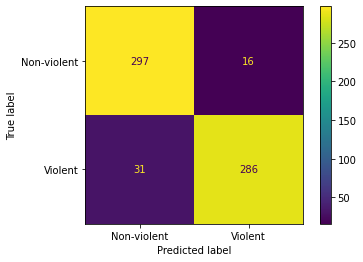

In [63]:
plot_confusion_matrix(svc, X_test.values, y_test.values, display_labels=["Non-violent", "Violent"])

In [64]:
accuracy_score1 = accuracy_score(y_test, y_pred)
accuracy_score1

0.9253968253968254

In [21]:
precision_score1 = precision_score(y_test, y_pred)
recall_score1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

fp1, tp1, th1 = roc_curve(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.97      0.74       313
           1       0.93      0.36      0.52       317

    accuracy                           0.67       630
   macro avg       0.77      0.67      0.63       630
weighted avg       0.77      0.67      0.63       630



## Export model

In [23]:
import joblib
joblib.dump(svc, 'violence_detector.pkl', compress=9)

['violence_detector.pkl']

Now that the model has been exported we can use it in out violence detection code

## Storing multiple frames in a single row

By storing the data of multiple frames in a single row we'll be able to give our model a better understanding of the video's current state. We must first transform our initial dataset in order to store data from 5 frames in a single row.

In [3]:
import pandas as pd

frame_data = pd.read_csv("frame_data.csv", header=0)

In [31]:
# create new pandas dataframe

# added frame data about the past 5 frames
angles_features = [
    ["0-person0_rs_angle", 
    "0-person0_re_angle", 
    "0-person0_rk_angle", 
    "0-person0_ls_angle", 
    "0-person0_le_angle", 
    "0-person0_lk_angle", 
    "0-person1_rs_angle",
    "0-person1_re_angle",
    "0-person1_rk_angle",
    "0-person1_ls_angle",
    "0-person1_le_angle",
    "0-person1_lk_angle"],

    ["1-person0_rs_angle", 
    "1-person0_re_angle", 
    "1-person0_rk_angle", 
    "1-person0_ls_angle", 
    "1-person0_le_angle", 
    "1-person0_lk_angle", 
    "1-person1_rs_angle",
    "1-person1_re_angle",
    "1-person1_rk_angle",
    "1-person1_ls_angle",
    "1-person1_le_angle",
    "1-person1_lk_angle"],

    ["2-person0_rs_angle", 
    "2-person0_re_angle", 
    "2-person0_rk_angle", 
    "2-person0_ls_angle", 
    "2-person0_le_angle", 
    "2-person0_lk_angle", 
    "2-person1_rs_angle",
    "2-person1_re_angle",
    "2-person1_rk_angle",
    "2-person1_ls_angle",
    "2-person1_le_angle",
    "2-person1_lk_angle"],

    ["3-person0_rs_angle", 
    "3-person0_re_angle", 
    "3-person0_rk_angle", 
    "3-person0_ls_angle", 
    "3-person0_le_angle", 
    "3-person0_lk_angle", 
    "3-person1_rs_angle",
    "3-person1_re_angle",
    "3-person1_rk_angle",
    "3-person1_ls_angle",
    "3-person1_le_angle",
    "3-person1_lk_angle"],

    ["4-person0_rs_angle", 
    "4-person0_re_angle", 
    "4-person0_rk_angle", 
    "4-person0_ls_angle", 
    "4-person0_le_angle", 
    "4-person0_lk_angle", 
    "4-person1_rs_angle",
    "4-person1_re_angle",
    "4-person1_rk_angle",
    "4-person1_ls_angle",
    "4-person1_le_angle",
    "4-person1_lk_angle"]
]

velocity_features = [
    ["0-person0_h_velocity",
    "0-person0_rs_velocity",
    "0-person0_re_velocity",
    "0-person0_rw_velocity",
    "0-person0_rh_velocity",
    "0-person0_ls_velocity",
    "0-person0_le_velocity",
    "0-person0_lw_velocity",
    "0-person0_lh_velocity",
    "0-person1_h_velocity",
    "0-person1_rs_velocity",
    "0-person1_re_velocity",
    "0-person1_rw_velocity",
    "0-person1_rh_velocity",
    "0-person1_ls_velocity",
    "0-person1_le_velocity",
    "0-person1_lw_velocity",
    "0-person1_lh_velocity"],
    
    ["1-person0_h_velocity",
    "1-person0_rs_velocity",
    "1-person0_re_velocity",
    "1-person0_rw_velocity",
    "1-person0_rh_velocity",
    "1-person0_ls_velocity",
    "1-person0_le_velocity",
    "1-person0_lw_velocity",
    "1-person0_lh_velocity",
    "1-person1_h_velocity",
    "1-person1_rs_velocity",
    "1-person1_re_velocity",
    "1-person1_rw_velocity",
    "1-person1_rh_velocity",
    "1-person1_ls_velocity",
    "1-person1_le_velocity",
    "1-person1_lw_velocity",
    "1-person1_lh_velocity"],

    ["2-person0_h_velocity",
    "2-person0_rs_velocity",
    "2-person0_re_velocity",
    "2-person0_rw_velocity",
    "2-person0_rh_velocity",
    "2-person0_ls_velocity",
    "2-person0_le_velocity",
    "2-person0_lw_velocity",
    "2-person0_lh_velocity",
    "2-person1_h_velocity",
    "2-person1_rs_velocity",
    "2-person1_re_velocity",
    "2-person1_rw_velocity",
    "2-person1_rh_velocity",
    "2-person1_ls_velocity",
    "2-person1_le_velocity",
    "2-person1_lw_velocity",
    "2-person1_lh_velocity"],

    ["3-person0_h_velocity",
    "3-person0_rs_velocity",
    "3-person0_re_velocity",
    "3-person0_rw_velocity",
    "3-person0_rh_velocity",
    "3-person0_ls_velocity",
    "3-person0_le_velocity",
    "3-person0_lw_velocity",
    "3-person0_lh_velocity",
    "3-person1_h_velocity",
    "3-person1_rs_velocity",
    "3-person1_re_velocity",
    "3-person1_rw_velocity",
    "3-person1_rh_velocity",
    "3-person1_ls_velocity",
    "3-person1_le_velocity",
    "3-person1_lw_velocity",
    "3-person1_lh_velocity"],

    ["4-person0_h_velocity",
    "4-person0_rs_velocity",
    "4-person0_re_velocity",
    "4-person0_rw_velocity",
    "4-person0_rh_velocity",
    "4-person0_ls_velocity",
    "4-person0_le_velocity",
    "4-person0_lw_velocity",
    "4-person0_lh_velocity",
    "4-person1_h_velocity",
    "4-person1_rs_velocity",
    "4-person1_re_velocity",
    "4-person1_rw_velocity",
    "4-person1_rh_velocity",
    "4-person1_ls_velocity",
    "4-person1_le_velocity",
    "4-person1_lw_velocity",
    "4-person1_lh_velocity"]
]

contact_features = ["0-has_contact","1-has_contact","2-has_contact","3-has_contact","4-has_contact"]

new_feature_columns = [angles_features[i] + velocity_features[i] + [contact_features[i]] for i in range(5)]

new_columns = ["file_name", "batch_number"] + new_feature_columns[0] + new_feature_columns[1] + new_feature_columns[2] + new_feature_columns[3] + new_feature_columns[4] + ["label"]

new_frame_data = pd.DataFrame(columns=new_columns)

new_frame_data

,file_name,batch_number,0-person0_rs_angle,0-person0_re_angle,0-person0_rk_angle,0-person0_ls_angle,0-person0_le_angle,0-person0_lk_angle,0-person1_rs_angle,0-person1_re_angle,...,4-person1_rs_velocity,4-person1_re_velocity,4-person1_rw_velocity,4-person1_rh_velocity,4-person1_ls_velocity,4-person1_le_velocity,4-person1_lw_velocity,4-person1_lh_velocity,4-has_contact,label


In [33]:
curr_batch = []
curr_file = ""
batch_number = 0
counter = 0

for index, row in frame_data.iterrows():
    # for each row in our frame data
    if curr_file != row["file_name"]:
        # we're in a new file
        curr_file = row["file_name"]
        curr_label = row["label"]
        print("curr_file is -> {}".format(curr_file))
        
        # clear the curr batch since we're in a new file
        curr_batch.clear()

    # curr frame list will store the current frame's data
    curr_frame = []

    # do not include first 2 and last columns
    for i in range(2, len(row)-1):
        curr_frame.append(row[i])

    # add curr frame to the curr batch
    curr_batch.append(curr_frame)

    if len(curr_batch) == 5:
        # we have enough values in curr batch and can now add the batch to the dataframe        
        results = [curr_file, batch_number] + curr_batch[0] + curr_batch[1] + curr_batch[2] + curr_batch[3] + curr_batch[4] + [curr_label]

        new_row = {new_columns[i] : results[i] for i in range(len(results))}

        # add current batch to dataframe
        new_frame_data = new_frame_data.append(new_row, ignore_index= True)

        # increment batch number
        batch_number += 1

        # erase oldest value
        del curr_batch[0]

curr_file is -> 0_act_01-1
curr_file is -> 0_act_01-2
curr_file is -> 0_act_01-4
curr_file is -> 0_act_01-5
curr_file is -> 0_act_01-7
curr_file is -> 0_act_01-8
curr_file is -> 0_act_02-1
curr_file is -> 0_act_02-2
curr_file is -> 0_act_02-3
curr_file is -> 0_act_02-4
curr_file is -> 0_act_02-5
curr_file is -> 0_act_02-7
curr_file is -> 0_act_02-8
curr_file is -> 0_act_03-1
curr_file is -> 0_act_03-2
curr_file is -> 0_act_03-3
curr_file is -> 0_act_03-4
curr_file is -> 0_act_03-5
curr_file is -> 0_act_03-7
curr_file is -> 0_act_03-8
curr_file is -> 0_act_04-1
curr_file is -> 0_act_04-2
curr_file is -> 0_act_04-3
curr_file is -> 0_act_04-4
curr_file is -> 0_act_04-5
curr_file is -> 0_act_04-7
curr_file is -> 0_act_04-8
curr_file is -> 0_act_07-1
curr_file is -> 0_act_07-2
curr_file is -> 0_act_07-3
curr_file is -> 0_act_07-4
curr_file is -> 0_act_07-5
curr_file is -> 0_act_07-6
curr_file is -> 0_act_07-7
curr_file is -> 0_act_07-8
curr_file is -> 0_act_08-1
curr_file is -> 0_act_08-2
c

In [36]:
new_frame_data.to_csv("new_frame_data.csv", index = False)

In [35]:
new_frame_data

,file_name,batch_number,0-person0_rs_angle,0-person0_re_angle,0-person0_rk_angle,0-person0_ls_angle,0-person0_le_angle,0-person0_lk_angle,0-person1_rs_angle,0-person1_re_angle,...,4-person1_rs_velocity,4-person1_re_velocity,4-person1_rw_velocity,4-person1_rh_velocity,4-person1_ls_velocity,4-person1_le_velocity,4-person1_lw_velocity,4-person1_lh_velocity,4-has_contact,label
0,0_act_01-1,0,-44.313901,40.321854,-2.954404,-49.890005,-2.853244,9.220236,-74.762344,35.882671,...,1.366838,154.773202,276.320590,238.907877,140.285005,175.902267,0.000000,121.669704,0,0
1,0_act_01-1,1,-43.616898,39.057503,-3.924313,-50.022667,-3.395105,6.359562,-65.578794,29.528825,...,7325.249183,6250.207071,4111.289846,1178.478537,8417.526382,8148.428249,17173.905470,6974.465978,0,0
2,0_act_01-1,2,-39.105373,35.926545,-2.233107,-52.264982,-1.726397,5.073436,-59.454060,33.295261,...,7247.309029,6209.843240,3838.850131,979.999708,8418.709669,7757.947609,17173.905470,7094.940115,0,0
3,0_act_01-1,3,-40.353648,39.726739,1.886326,-52.209729,-2.100735,4.351955,-11.585345,33.172497,...,7245.211171,6206.675494,3836.510312,862.720507,8417.710434,7796.888768,17175.891454,7093.869354,0,0
4,0_act_01-1,4,-39.058556,35.680477,6.794678,-51.606731,-1.327010,4.631022,-36.386967,33.153713,...,55.823662,39.067790,36.938616,78.194753,122.859243,40.236258,39.651465,39.048756,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85584,1_act_06-8,83794,-64.064376,-4.190437,1.502036,-69.013152,24.626115,5.747133,-74.333818,25.327162,...,116.480566,79.085889,85.591623,1.955675,86.985676,79.389257,285.324799,2.153754,0,1
85585,1_act_06-8,83795,-69.296672,1.247574,8.082175,-65.400410,23.912429,13.329805,-66.857225,17.348895,...,39.353464,123.188994,38.369916,38.426232,55.476056,197.900795,251.090968,39.646308,0,1
85586,1_act_06-8,83796,-78.054347,9.767371,15.658577,-73.582881,20.659616,18.681251,-72.115333,12.860027,...,39.187718,86.473143,1.114200,77.689489,38.253683,39.677173,272.544312,123.556509,0,1
85587,1_act_06-8,83797,-87.945024,14.418685,15.230761,-65.447551,15.051044,19.634724,-78.535323,16.310014,...,0.620297,54.991334,38.508459,160.574482,39.213533,57.036903,163.282733,39.536628,0,1


## Training Violence Detector with 5 sequential frames

This version will analyze 5 sequential frames.

In [1]:
import pandas as pd # used to load and manipulate the data
import matplotlib.pyplot as plt # used to draw graphs
from sklearn.model_selection import train_test_split # used to split the data into train and test sets
from sklearn.svm import SVC # used to make the SVM
from sklearn.model_selection import GridSearchCV # used for cross validation
from sklearn.metrics import classification_report # used to create a classification report
from sklearn.metrics import plot_confusion_matrix # used to plot the confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve # used to evaluate models
from sklearn.model_selection import cross_val_score # used to cross validate
# import io # for google colab
# from google.colab import files # for google colab
df = pd.read_csv("new_frame_data.csv", header=0)

df.head()

,file_name,batch_number,0-person0_rs_angle,0-person0_re_angle,0-person0_rk_angle,0-person0_ls_angle,0-person0_le_angle,0-person0_lk_angle,0-person1_rs_angle,0-person1_re_angle,...,4-person1_rs_velocity,4-person1_re_velocity,4-person1_rw_velocity,4-person1_rh_velocity,4-person1_ls_velocity,4-person1_le_velocity,4-person1_lw_velocity,4-person1_lh_velocity,4-has_contact,label
0,0_act_01-1,0,-44.313901,40.321854,-2.954404,-49.890005,-2.853244,9.220236,-74.762344,35.882671,...,1.366838,154.773202,276.320590,238.907877,140.285005,175.902267,0.000000,121.669704,0,0
1,0_act_01-1,1,-43.616898,39.057503,-3.924313,-50.022667,-3.395105,6.359562,-65.578794,29.528825,...,7325.249183,6250.207071,4111.289846,1178.478537,8417.526382,8148.428249,17173.905470,6974.465978,0,0
2,0_act_01-1,2,-39.105373,35.926545,-2.233107,-52.264982,-1.726397,5.073436,-59.454060,33.295261,...,7247.309029,6209.843240,3838.850131,979.999708,8418.709669,7757.947609,17173.905470,7094.940115,0,0
3,0_act_01-1,3,-40.353648,39.726739,1.886326,-52.209729,-2.100735,4.351955,-11.585345,33.172497,...,7245.211171,6206.675494,3836.510312,862.720507,8417.710434,7796.888768,17175.891454,7093.869354,0,0
4,0_act_01-1,4,-39.058556,35.680477,6.794678,-51.606731,-1.327010,4.631022,-36.386967,33.153713,...,55.823662,39.067790,36.938616,78.194753,122.859243,40.236258,39.651465,39.048756,0,0


In [2]:
df.dropna(inplace=True) # drop any row with any missing value
df.shape # shows if there are rows dropped

(85589, 158)

In [3]:
df.dtypes

file_name                 object
batch_number               int64
0-person0_rs_angle       float64
0-person0_re_angle       float64
0-person0_rk_angle       float64
                          ...   
4-person1_le_velocity    float64
4-person1_lw_velocity    float64
4-person1_lh_velocity    float64
4-has_contact              int64
label                      int64
Length: 158, dtype: object

In [4]:
X = df.drop(labels=["label", "file_name", "batch_number"], axis=1)
X

,0-person0_rs_angle,0-person0_re_angle,0-person0_rk_angle,0-person0_ls_angle,0-person0_le_angle,0-person0_lk_angle,0-person1_rs_angle,0-person1_re_angle,0-person1_rk_angle,0-person1_ls_angle,...,4-person1_h_velocity,4-person1_rs_velocity,4-person1_re_velocity,4-person1_rw_velocity,4-person1_rh_velocity,4-person1_ls_velocity,4-person1_le_velocity,4-person1_lw_velocity,4-person1_lh_velocity,4-has_contact
0,-44.313901,40.321854,-2.954404,-49.890005,-2.853244,9.220236,-74.762344,35.882671,6.248870,-22.833763,...,39.866225,1.366838,154.773202,276.320590,238.907877,140.285005,175.902267,0.000000,121.669704,0
1,-43.616898,39.057503,-3.924313,-50.022667,-3.395105,6.359562,-65.578794,29.528825,5.487582,-80.263080,...,4696.748286,7325.249183,6250.207071,4111.289846,1178.478537,8417.526382,8148.428249,17173.905470,6974.465978,0
2,-39.105373,35.926545,-2.233107,-52.264982,-1.726397,5.073436,-59.454060,33.295261,5.823393,-48.465249,...,4696.736293,7247.309029,6209.843240,3838.850131,979.999708,8418.709669,7757.947609,17173.905470,7094.940115,0
3,-40.353648,39.726739,1.886326,-52.209729,-2.100735,4.351955,-11.585345,33.172497,5.917913,18.503036,...,4659.257385,7245.211171,6206.675494,3836.510312,862.720507,8417.710434,7796.888768,17175.891454,7093.869354,0
4,-39.058556,35.680477,6.794678,-51.606731,-1.327010,4.631022,-36.386967,33.153713,5.909791,-19.169556,...,2.132209,55.823662,39.067790,36.938616,78.194753,122.859243,40.236258,39.651465,39.048756,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85584,-64.064376,-4.190437,1.502036,-69.013152,24.626115,5.747133,-74.333818,25.327162,-13.236066,-75.817541,...,1.864070,116.480566,79.085889,85.591623,1.955675,86.985676,79.389257,285.324799,2.153754,0
85585,-69.296672,1.247574,8.082175,-65.400410,23.912429,13.329805,-66.857225,17.348895,-13.530310,-61.088042,...,38.434229,39.353464,123.188994,38.369916,38.426232,55.476056,197.900795,251.090968,39.646308,0
85586,-78.054347,9.767371,15.658577,-73.582881,20.659616,18.681251,-72.115333,12.860027,-10.110459,-66.618487,...,154.346195,39.187718,86.473143,1.114200,77.689489,38.253683,39.677173,272.544312,123.556509,0
85587,-87.945024,14.418685,15.230761,-65.447551,15.051044,19.634724,-78.535323,16.310014,-12.086641,-70.542920,...,1.812811,0.620297,54.991334,38.508459,160.574482,39.213533,57.036903,163.282733,39.536628,0


In [5]:
y = df["label"]
y

0        0
1        0
2        0
3        0
4        0
        ..
85584    1
85585    1
85586    1
85587    1
85588    1
Name: label, Length: 85589, dtype: int64

In [8]:
np.unique(y)

array([0, 1], dtype=int64)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [10]:
svc = SVC(kernel = 'rbf', C = 1, random_state=0)
svc.fit(X_train.values, y_train.values)

SVC(C=1, random_state=0)

In [11]:
y_pred = svc.predict(X_test.values)

C:\Users\pjsan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


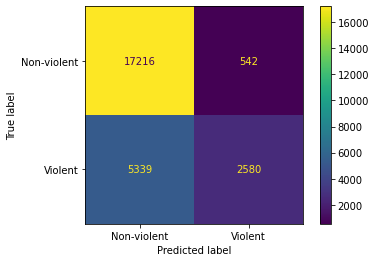

In [12]:
plot_confusion_matrix(svc, X_test.values, y_test.values, display_labels=["Non-violent", "Violent"])

In [13]:
accuracy_score1 = accuracy_score(y_test, y_pred)
accuracy_score1

0.7709623398372084

In [14]:
precision_score1 = precision_score(y_test, y_pred)
recall_score1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

In [15]:
fp1, tp1, th1 = roc_curve(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85     17758
           1       0.83      0.33      0.47      7919

    accuracy                           0.77     25677
   macro avg       0.79      0.65      0.66     25677
weighted avg       0.78      0.77      0.73     25677



### Testing paramters with Grid Search CV

In [17]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':(['rbf']), 'C':[1, 10, 1E3]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train.values, y_train.values)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 1000.0], 'kernel': ['rbf']})

In [18]:
clf.best_params_

{'C': 1000.0, 'kernel': 'rbf'}

In [20]:
y_pred = clf.predict(X_test.values)

C:\Users\pjsan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


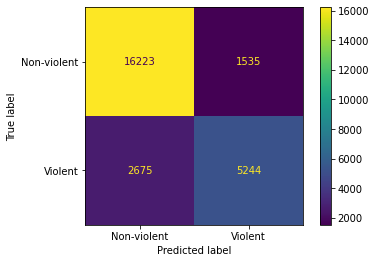

In [21]:
plot_confusion_matrix(clf, X_test.values, y_test.values, display_labels=["Non-violent", "Violent"])

In [22]:
accuracy_score1 = accuracy_score(y_test, y_pred)
accuracy_score1

0.8360400358297309

In [23]:
precision_score1 = precision_score(y_test, y_pred)
recall_score1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

In [24]:
fp1, tp1, th1 = roc_curve(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     17758
           1       0.77      0.66      0.71      7919

    accuracy                           0.84     25677
   macro avg       0.82      0.79      0.80     25677
weighted avg       0.83      0.84      0.83     25677



### Export New Model w/ best features

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [28]:
svc = SVC(kernel = 'rbf', C = 1E3, random_state=0)
svc.fit(X_train.values, y_train.values)

SVC(C=1000.0, random_state=0)

In [29]:
y_pred = svc.predict(X_test.values)

C:\Users\pjsan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


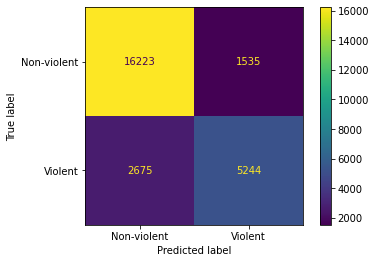

In [30]:
plot_confusion_matrix(svc, X_test.values, y_test.values, display_labels=["Non-violent", "Violent"])

In [31]:
accuracy_score1 = accuracy_score(y_test, y_pred)
accuracy_score1

0.8360400358297309

In [32]:
precision_score1 = precision_score(y_test, y_pred)
recall_score1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

In [33]:
fp1, tp1, th1 = roc_curve(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89     17758
           1       0.77      0.66      0.71      7919

    accuracy                           0.84     25677
   macro avg       0.82      0.79      0.80     25677
weighted avg       0.83      0.84      0.83     25677



In [35]:
import joblib
joblib.dump(svc, 'violence_detector_seq.pkl', compress=9)

['violence_detector_seq.pkl']